<h3>Загрузка датасету</h3>

In [1]:
import pandas as pd 
df = pd.read_csv("AirPassengers.csv")

In [2]:
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


<h3>Перетворення стовпця місяця в об’єкт datetime</h3>

In [3]:
df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m')
print(df.head())

       Month  #Passengers
0 1949-01-01          112
1 1949-02-01          118
2 1949-03-01          132
3 1949-04-01          129
4 1949-05-01          121


<h3>Перетворення стовпця місяця в індекс для кращої роботи з алгоритмами</h3>

In [4]:
df.index = df['Month']
del df['Month']
print(df.head())

            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121


<h3>Візуалізація часового ряду</h3>

C:\Users\amigo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\amigo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\amigo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\amigo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

Text(0, 0.5, 'Number of Passengers')

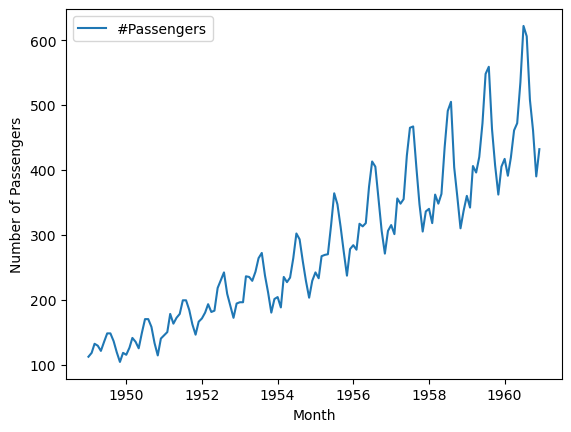

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns 
sns.lineplot(df)
plt.ylabel("Number of Passengers")

<h2>Стаціонарність</h2>

<h3>Візуалізація оригінально ЧР, його рухомого середнього та рухомого стандартного відхилення для аналізу тренду, коливань та змінливості у даних</h3>

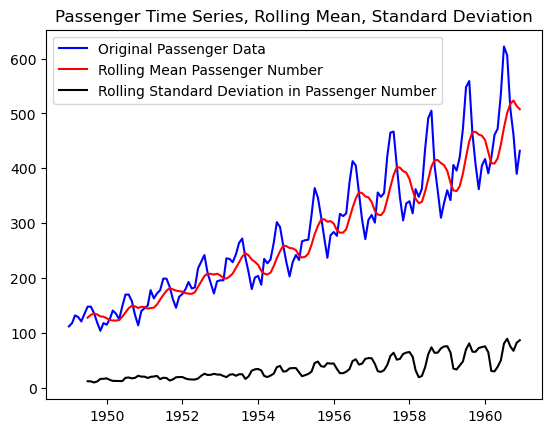

In [8]:
rolling_mean = df.rolling(7).mean()
rolling_std = df.rolling(7).std()
plt.plot(df, color="blue",label="Original Passenger Data")
plt.plot(rolling_mean, color="red", label="Rolling Mean Passenger Number")
plt.plot(rolling_std, color="black", label = "Rolling Standard Deviation in Passenger Number")
plt.title("Passenger Time Series, Rolling Mean, Standard Deviation")
plt.legend(loc="best")

<h3>Візуалізація результатів аналізу про стаціонарність</h3>

In [9]:
from statsmodels.tsa.stattools import adfuller
adft = adfuller(df,autolag="AIC")

output_df = pd.DataFrame({"Values":[adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']]  , "Metric":["Test Statistics","p-value","No. of lags used","Number of observations used", 
                                                        "critical value (1%)", "critical value (5%)", "critical value (10%)"]})
output_df

,Values,Metric
0,0.815369,Test Statistics
1,0.991880,p-value
2,13.000000,No. of lags used
3,130.000000,Number of observations used
4,-3.481682,critical value (1%)
5,-2.884042,critical value (5%)
6,-2.578770,critical value (10%)


<p>Ми бачимо, що наші дані не є стаціонарними з того факту, що наше p-значення перевищує 5 відсотків, а тестова статистика перевищує критичне значення. Ми також можемо зробити ці висновки, перевіривши дані, оскільки ми бачимо чітку тенденцію в минулому графіку до збільшення кількості пасажирів.</p>

<h2>Автокореляція</h2>

In [11]:
autocorrelation_lag1 = df['#Passengers'].autocorr(lag=1)
print("One Month Lag: ", autocorrelation_lag1)

autocorrelation_lag3 = df['#Passengers'].autocorr(lag=3)
print("Three Month Lag: ", autocorrelation_lag3)

autocorrelation_lag6 = df['#Passengers'].autocorr(lag=6)
print("Six Month Lag: ", autocorrelation_lag6)

autocorrelation_lag9 = df['#Passengers'].autocorr(lag=9)
print("Nine Month Lag: ", autocorrelation_lag9)

One Month Lag:  0.9601946480498524
Three Month Lag:  0.8373947650817942
Six Month Lag:  0.7839187959206184
Nine Month Lag:  0.8278519011167601


<p>Ми бачимо, що навіть із дев’ятимісячним відставанням дані мають високу автокореляцію. Це ще одна ілюстрація коротко- та довгострокових тенденцій у даних.<p>

<h3>Побудова графіків автокореляції та часткової автокореляції</h3>

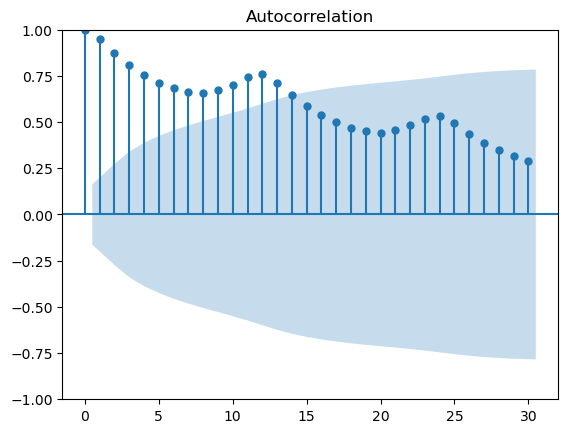

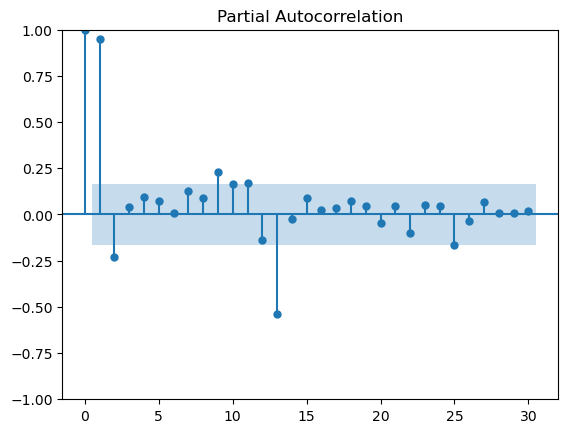

In [12]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Графік автокореляції
plot_acf(df['#Passengers'].dropna(), lags=30)
plt.show()

# Графік часткової автокореляції
plot_pacf(df['#Passengers'].dropna(), lags=30)
plt.show()

<h2>Побудова та оптимізація ARIMA-моделі</h2>

C:\Users\amigo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\amigo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\amigo\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\amigo\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


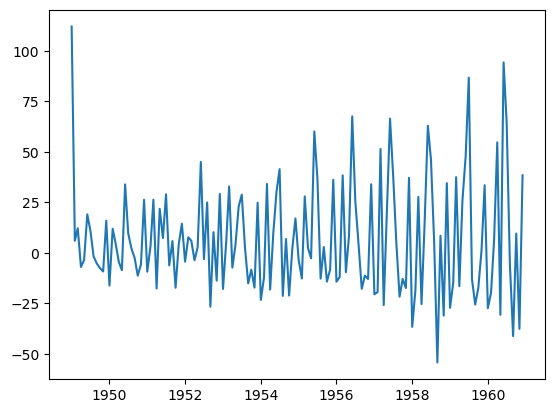

In [15]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima

# Автоматичний вибір параметрів для ARIMA
autoarima_model = auto_arima(df['#Passengers'], seasonal=True, suppress_warnings=True)

# Отримання оптимальних параметрів
order = autoarima_model.order
seasonal_order = autoarima_model.seasonal_order

# Побудова SARIMA моделі
sarima_model = SARIMAX(df['#Passengers'], order=order, seasonal_order=seasonal_order)
sarima_result = sarima_model.fit(disp=False)

# Аналіз залишків
residuals = sarima_result.resid
plt.plot(residuals)
plt.show()


<h2>Прогнозування</h2>

In [19]:
# Прогноз для наступних n періодів
n_periods = 12
forecast = sarima_result.get_forecast(steps=n_periods)

# Довірчий інтервал
confidence_interval = forecast.conf_int()

# Виведення результатів
print(forecast.predicted_mean)
print(confidence_interval)


1961-01-01    467.573788
1961-02-01    490.494532
1961-03-01    509.136912
1961-04-01    492.554745
1961-05-01    495.305961
1961-06-01    475.947806
1961-07-01    476.339843
1961-08-01    475.552141
1961-09-01    472.353819
1961-10-01    483.889665
1961-11-01    475.570182
1961-12-01    485.921529
Freq: MS, Name: predicted_mean, dtype: float64
            lower #Passengers  upper #Passengers
1961-01-01         414.830267         520.317309
1961-02-01         401.936907         579.052157
1961-03-01         403.594229         614.679595
1961-04-01         379.059449         606.050041
1961-05-01         380.312244         610.299679
1961-06-01         360.282570         591.613041
1961-07-01         360.279291         592.400394
1961-08-01         358.711040         592.393241
1961-09-01         353.597634         591.110004
1961-10-01         363.177410         604.601921
1961-11-01         351.824738         599.315627
1961-12-01         360.014297         611.828761


<h2>Знаходження аномалій</h2>

In [28]:
from scipy.stats import zscore

# Розрахунок Z-оцінок для кожного значення в ряду
df['Z_Score'] = zscore(df['#Passengers'])

# Визначення аномалій за певний поріг Z-оцінок
anomaly_threshold = 2.5
anomalies = df[abs(df['Z_Score']) > anomaly_threshold]

# Виведення аномалій
print("Anomalies:")
print(anomalies)


Anomalies:
            #Passengers   Z_Score
Month                            
1960-07-01          622  2.858253
1960-08-01          606  2.724417


<h2>Кореляція між пасажиропотоком в певний місяць і його значеннями у попередніх місяцях.</h2>

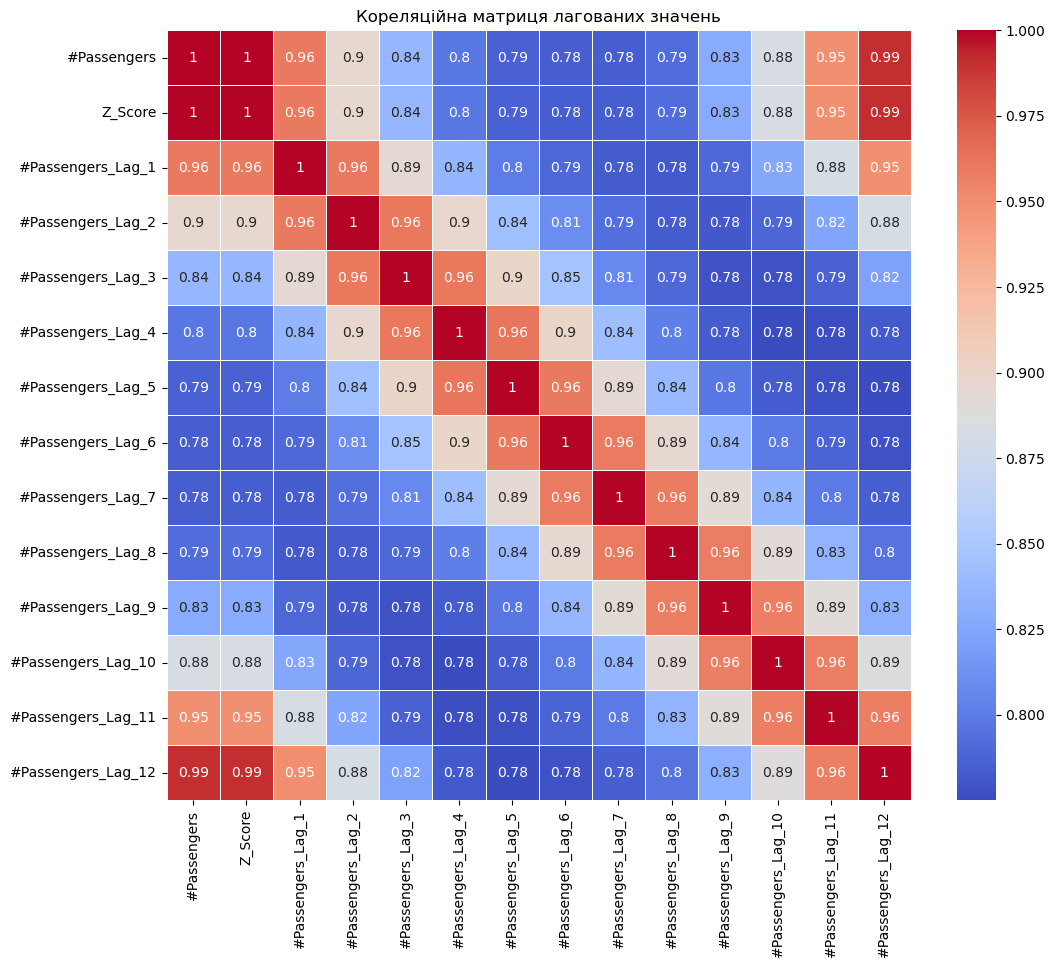

In [29]:
# Додамо лаговані значення для кожного місяця (наприклад, лаг 1 для січня, лаг 2 для лютий і т.д.)
for i in range(1, 13):
    df[f'#Passengers_Lag_{i}'] = df['#Passengers'].shift(i)

# Побудуємо heatmap для кореляційної матриці лагованих значень
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Кореляційна матриця лагованих значень')
plt.show()
